In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os




In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

def force_reshape_to_feature(tensor, target_shape=(3, 1080, 1440)):
    """将任意维度的张量 reshape 成指定形状，不足补 0，过长裁剪"""
    target_size = np.prod(target_shape)
    flat = tensor.flatten()
    current_size = flat.size

    if current_size > target_size:
        print("⚠️ 数据过多，裁剪后 reshape")
        flat = flat[:target_size]
    elif current_size < target_size:
        print("⚠️ 数据不足，padding 0 后 reshape")
        padding = target_size - current_size
        flat = np.concatenate([flat, np.zeros(padding, dtype=flat.dtype)])

    return flat.reshape(target_shape)

def print_level_feature(level):
    paths = [
        f"feature_in_training/00_lv{level}_masked_gt.npy",
        f"feature_in_training/04_lv{level}_masked_gt.npy",
        f"feature_in_training/19_lv{level}_masked_gt.npy",
        f"feature_in_training/25_lv{level}_masked_gt.npy",
        f"feature_in_training/30_lv{level}_masked_gt.npy"
    ]

    plt.figure(figsize=(20, 4))

    for i, path in enumerate(paths):
        try:
            feature = np.load(path)
            feature = force_reshape_to_feature(feature)  # 强制 reshape 成 (3, 1080, 1440)

            if feature.shape[0] == 3:
                feature_rgb = np.transpose(feature, (1, 2, 0))  # (C, H, W) → (H, W, C)
            else:
                raise ValueError(f"Unexpected shape: {feature.shape}")

            # 归一化到 [0, 1]
            feature_rgb -= feature_rgb.min()
            feature_rgb /= feature_rgb.max() + 1e-8

            plt.subplot(1, 5, i + 1)
            plt.imshow(feature_rgb)
            plt.title(os.path.basename(path).split('_')[0])
            plt.axis('off')

        except Exception as e:
            print(f"❌ 读取 {path} 时出错: {e}")
            plt.subplot(1, 5, i + 1)
            plt.text(0.5, 0.5, 'Load Fail', ha='center', va='center')
            plt.axis('off')

    plt.tight_layout()
    plt.show()


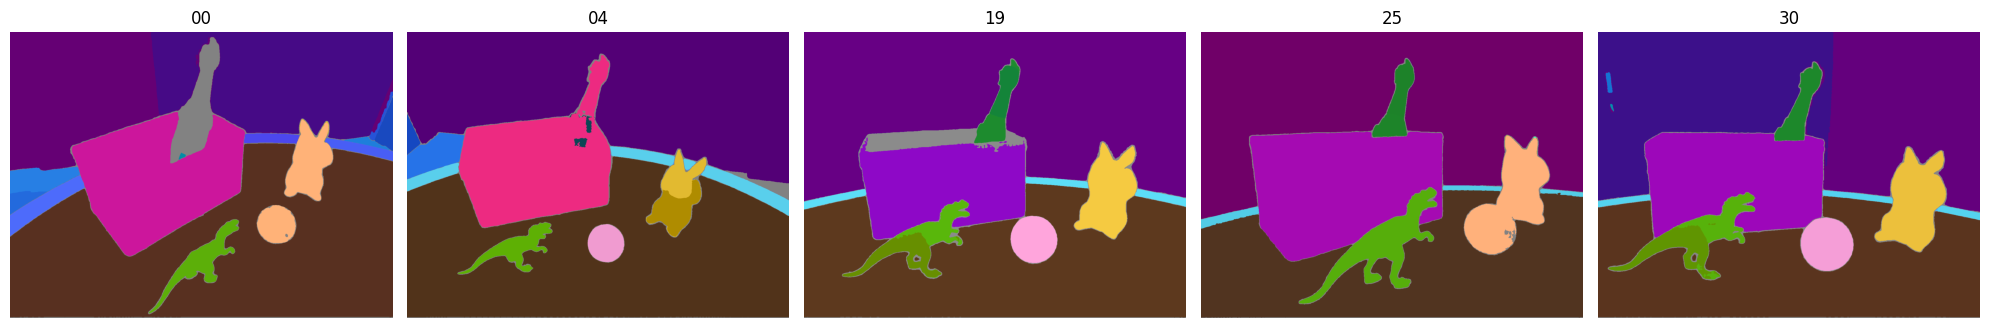

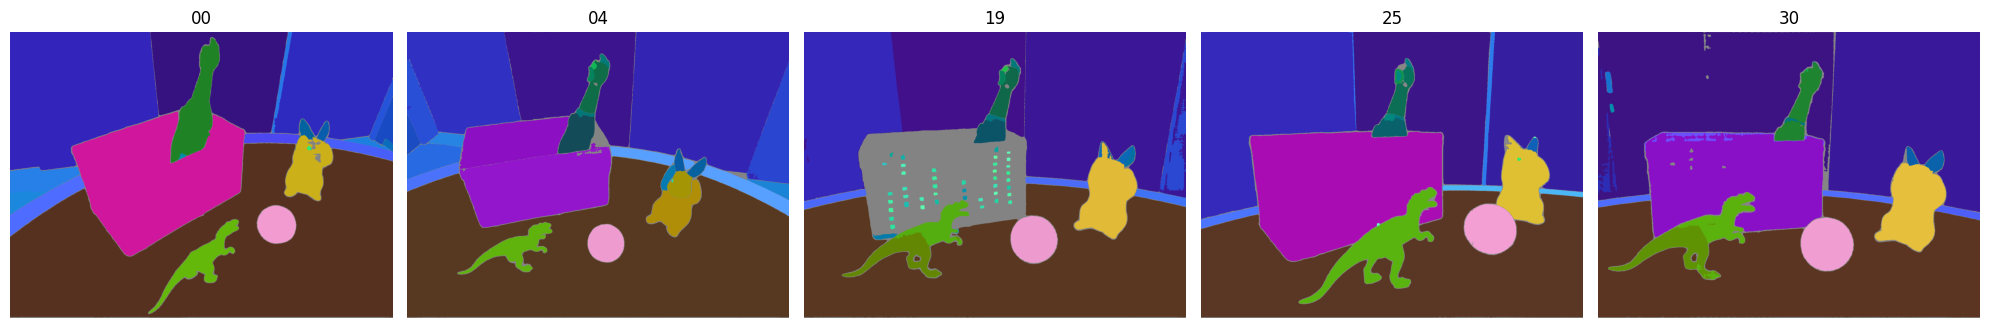

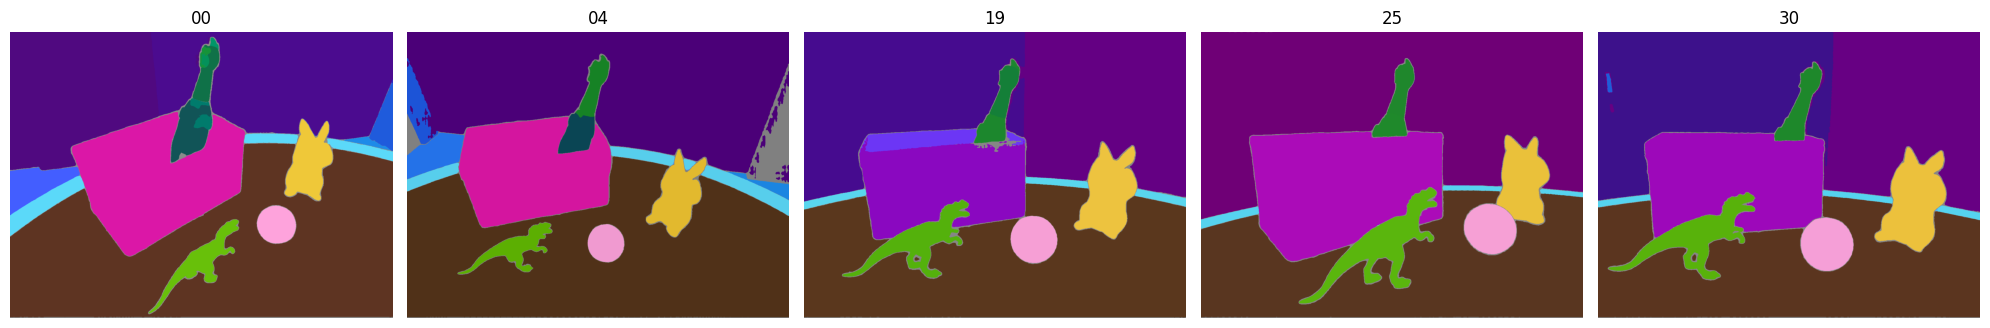

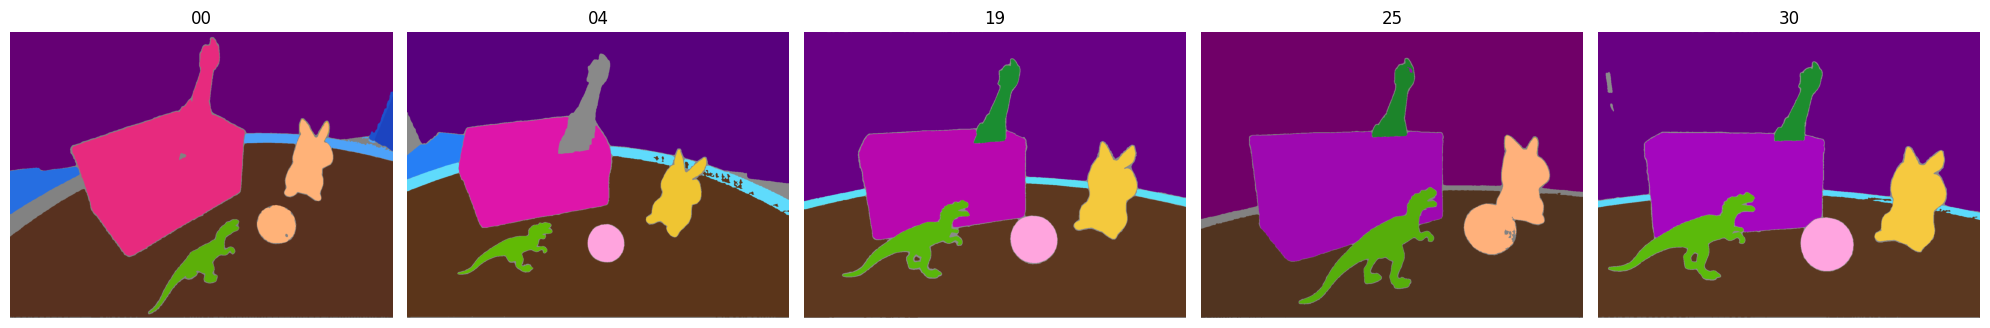

In [19]:
print_level_feature(0)
print_level_feature(1)
print_level_feature(2)
print_level_feature(3)